current range: -7e-08, -1.500815660685155e-06
Injection integral (min and max): 1.0000000000000084e-16, -1.7159787928221857e-13
photon energy @ 9 keV: -0.2531557775003489, 434.40994547100695
Peaking time: 405 ns
Config bits: 0101011
Channel to be tested: shap


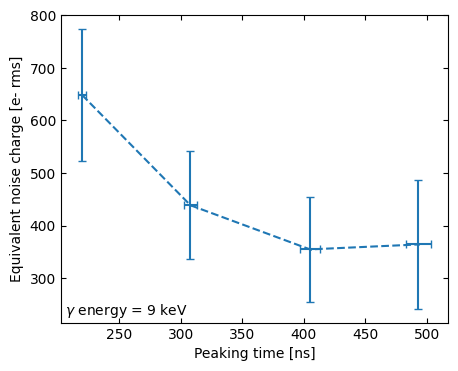

In [3]:
# CSA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from datetime import datetime
import matplotlib.colors as mcolors

import config
config.config(channel='shap',n_steps=20,cfg_bits=[0,1,0,1,0,1,1],cfg_inst=False)

colours = list(mcolors.TABLEAU_COLORS.keys())
# path = [
#     "G:/My Drive/PHD/FALCON/measures/enc/enc_0100011_160424_181001.tsv", # 9 keV, 220 ns
#     "G:/My Drive/PHD/FALCON/measures/enc/enc_0100111_160424_181122.tsv", # 9 keV, 308 ns
#     "G:/My Drive/PHD/FALCON/measures/enc/enc_0101011_160424_181440.tsv", # 9 keV, 405 ns
#     "G:/My Drive/PHD/FALCON/measures/enc/enc_0101111_160424_181604.tsv"  # 9 keV, 493 ns
# ]
path = [
    "G:/My Drive/PHD/FALCON/measures/enc/enc_0100011_170424_174133.tsv", # 9 keV, 220 ns
    "G:/My Drive/PHD/FALCON/measures/enc/enc_0100111_170424_174144.tsv", # 9 keV, 308 ns
    "G:/My Drive/PHD/FALCON/measures/enc/enc_0101011_170424_174154.tsv", # 9 keV, 405 ns
    "G:/My Drive/PHD/FALCON/measures/enc/enc_0101111_170424_174114.tsv"  # 9 keV, 493 ns
]
modes = [
    220,
    308,
    405,
    493
]
dfs = []
for i in range(4):
    dfs.append(pd.read_csv(path[i],sep='\t'))
datetime_str = datetime.strftime(datetime.now(), '%d%m%y_%H%M%S')

fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(5)
data = []
data_std = []
for i in range(4):
    data.append(dfs[i]['ENC rms (e-)'][0])
    data_std.append(dfs[i]['ENC std std (e-).1'][0])

ax.plot(
	modes,
	data,
    '--',color=colours[0])
ax.errorbar(
	modes,
	data,
	xerr=[3, 5, 8, 10],
	yerr=data_std,
	fmt='s', markersize=1, capsize=3,
    color=colours[0])
ax.set_xlabel('Peaking time [ns]')
ax.set_ylabel(f'Equivalent noise charge [e- rms]')
ax.tick_params(right=True, top=True, direction='in')
if config.channel_name == 'shap':
	ax.text(.01,.01,f'$\\gamma$ energy = {config.photon_energy} keV',ha='left',va='bottom',transform=ax.transAxes)
plt.savefig(f'G:/My Drive/PHD/FALCON/measures/enc/summary/enc_summary_nominal_{datetime_str}_rms.pdf',dpi=300)

current range: -7e-08, -1.5e-06
Injection integral (min and max): 1.0000000000000084e-16, -1.715e-13
photon energy @ 9 keV: -0.2531557775003489, 434.16215841309474
Peaking time: 430 ns
Config bits: 0101011
Channel to be tested: shap


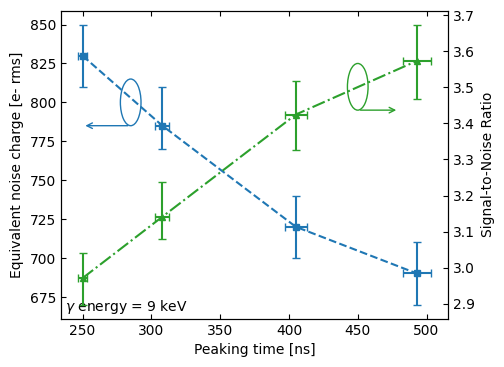

In [84]:
# ENC
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from datetime import datetime
import matplotlib.colors as mcolors
from matplotlib.patches import Ellipse

import config
config.config(channel='shap',n_steps=20,cfg_bits=[0,1,0,1,0,1,1],cfg_inst=False,lemo='lo')

colours = list(mcolors.TABLEAU_COLORS.keys())
# path = [
#     "G:/My Drive/PHD/FALCON/measures/enc/enc_0100011_160424_181001.tsv", # 9 keV, 220 ns
#     "G:/My Drive/PHD/FALCON/measures/enc/enc_0100111_160424_181122.tsv", # 9 keV, 308 ns
#     "G:/My Drive/PHD/FALCON/measures/enc/enc_0101011_160424_181440.tsv", # 9 keV, 405 ns
#     "G:/My Drive/PHD/FALCON/measures/enc/enc_0101111_160424_181604.tsv"  # 9 keV, 493 ns
# ]
#path = [
#    "G:/My Drive/PHD/FALCON/measures/enc/enc_0100011_170424_174133.tsv", # 9 keV, 220 ns
#    "G:/My Drive/PHD/FALCON/measures/enc/enc_0100111_170424_174144.tsv", # 9 keV, 308 ns
#    "G:/My Drive/PHD/FALCON/measures/enc/enc_0101011_170424_174154.tsv", # 9 keV, 405 ns
#    "G:/My Drive/PHD/FALCON/measures/enc/enc_0101111_170424_174114.tsv"  # 9 keV, 493 ns
#]
modes = [
    250,
    308,
    405,
    493
]
data = np.array([
    830,
    785,
    720,
    690
])
data_std = np.array([
	[810, 850],
	[770, 810],
	[700, 740],
	[670, 710],
])
min_charge = 1*9000/3.65

data_std_snr = min_charge/data_std
data_std = np.abs(data_std - np.tile(data, (2,1)).T) # remove mean
data_std_snr = np.abs(data_std_snr - np.tile(min_charge/data, (2,1)).T) # remove mean
data_std = data_std.T # transpose for matplotlib
data_std_snr = data_std_snr.T # transpose for matplotlib
datetime_str = datetime.strftime(datetime.now(), '%d%m%y_%H%M%S')

fig, ax1 = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(5)

ax2 = ax1.twinx()

ax1.plot(
	modes,
	data,
    '--',color=colours[0])
ax1.errorbar(
	modes,
	data,
	xerr=[3, 5, 8, 10],
	yerr=data_std,
	fmt='s', markersize=5, capsize=3,
    color=colours[0])

ax2.plot(
	modes,
	min_charge/data,
    '-.',color=colours[2])
ax2.errorbar(
	modes,
	min_charge/data,
	xerr=[3, 5, 8, 10],
	yerr=data_std_snr,
	fmt='^', markersize=5, capsize=3,
    color=colours[2])

ax1.set_xlabel('Peaking time [ns]', color='k')
ax1.set_ylabel(f'Equivalent noise charge [e- rms]')
ax2.set_ylabel(f'Signal-to-Noise Ratio')
ax1.tick_params(axis='y', direction='in')
ax2.tick_params(axis='y', direction='in')
ax1.tick_params(top=True, direction='in')

ax1.annotate('', xy=(285, 800-15), xytext=(250, 800-15), # start the arrow from x=7 and draw towards primary y-axis
            arrowprops=dict(arrowstyle="<-", color=colours[0]))
ellipse1 = Ellipse((285, 800), 15, 30, fill=None, edgecolor=colours[0])
ax1.add_artist(ellipse1)

ax1.annotate('', xy=(450, 810-15), xytext=(480, 810-15), # start the arrow from x=7 and draw towards primary y-axis
            arrowprops=dict(arrowstyle="<-", color=colours[2]))
ellipse1 = Ellipse((450, 810), 15, 30, fill=None, edgecolor=colours[2])
ax1.add_artist(ellipse1)

if config.channel_name == 'shap':
	ax1.text(.01,.01,f'$\\gamma$ energy = {config.photon_energy} keV',ha='left',va='bottom',transform=ax1.transAxes)
plt.savefig(f'G:/My Drive/PHD/FALCON/measures/enc/summary/enc_summary_nominal_{datetime_str}_oscilloscope_postfixes.pdf',dpi=300)

In [83]:
min_charge/350

7.045009784735812